In [ ]:
pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=75c306c295fc7931285e60fd6ae90aad59fd20db98a3a9896b7a0770649b25d0
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet

# Define data transformations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
])

Download the pre-trained EfficientNet model
model_name = 'efficientnet-b0'
backbone = EfficientNet.from_pretrained(model_name, num_classes=1000)

Add a dense layer on top of the EfficientNet backbone
class CustomModel(nn.Module):
    def __init__(self, backbone):
        super(CustomModel, self).__init__()
        self.backbone = backbone
        self.fc = nn.Linear(1000, 100)  # Adjust output size for CIFAR-100 (100)
        self.dropout = nn.Dropout(0.5)  # Adding dropout for regularization

    def forward(self, x):
        x = self.backbone(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x





100%|██████████| 169001437/169001437 [00:03<00:00, 48620305.20it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# Create an instance of the CustomModel
model = CustomModel(backbone)

# Define your data loaders
train_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)

# Splitting a validation set from the test dataset
test_size = len(test_dataset) // 2
validation_dataset, test_dataset = torch.utils.data.random_split(test_dataset, [test_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy:.4f}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

torch.save(model.state_dict(), '/content/drive/My Drive/models/my_model.pth')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from efficientnet_pytorch import EfficientNet
from efficientnet_pytorch import EfficientNet
# Path to your .pth file in Google Drive
file_path = '/content/drive/My Drive/final_model.pth'  # Replace with your file path


# Define your CustomModel class
class CustomModel(nn.Module):
    def __init__(self, backbone):
        super(CustomModel, self).__init__()
        self.backbone = backbone
        self.fc = nn.Linear(1000, 100)  # Ensure the output size matches the saved model
        self.dropout = nn.Dropout(0.5)  # Ensure the dropout rate matches the saved model

    def forward(self, x):
        x = self.backbone(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x


# Download the pre-trained EfficientNet model
model_name = 'efficientnet-b0'
backbone = EfficientNet.from_pretrained(model_name, num_classes=1000)

# Create an instance of CustomModel with the pre-trained EfficientNet backbone
model = CustomModel(backbone)

# Load the state dictionary into the model
model.load_state_dict(torch.load(file_path))

# Ensure the model is in evaluation mode
model.eval()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Loaded pretrained weights for efficientnet-b0


CustomModel(
  (backbone): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePaddin

In [ ]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
for epoch in range(num_epochs):
    model.train()
    total_train = 0
    correct_train = 0

    # Training loop
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = ((correct_train) / total_train)

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct_val = 0
        total_val = 0
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val

    print(f'Epoch {epoch+1}/{num_epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/5, Training Accuracy: 0.7386, Validation Accuracy: 0.8478
Epoch 2/5, Training Accuracy: 0.7391, Validation Accuracy: 0.8462
Epoch 3/5, Training Accuracy: 0.7404, Validation Accuracy: 0.8488
Epoch 4/5, Training Accuracy: 0.7415, Validation Accuracy: 0.8528


In [ ]:

torch.save(model.state_dict(), '/content/drive/My Drive/last.pth')

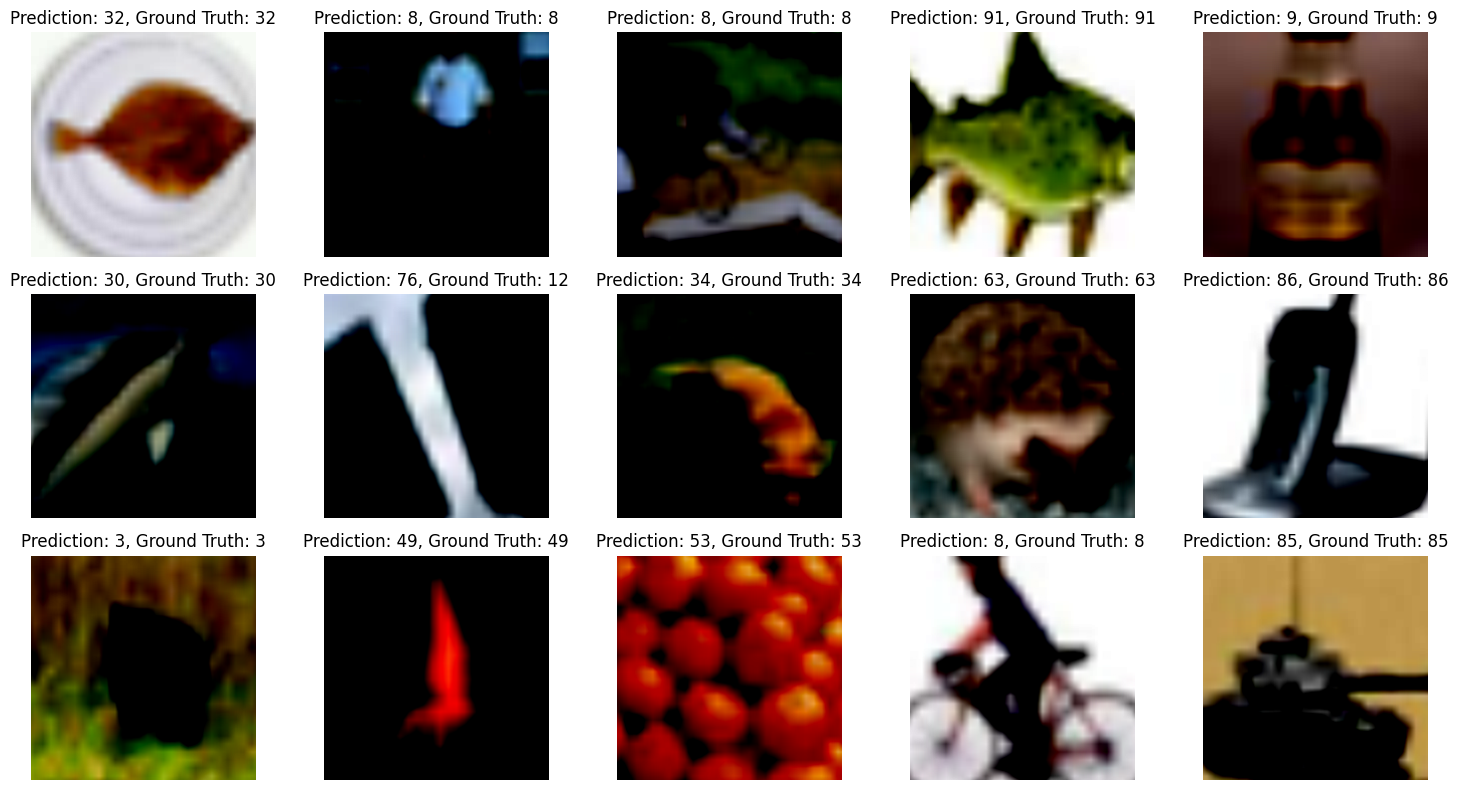

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display random images with predictions
def display_random_images(images, labels, predictions, num_images=15):
    plt.figure(figsize=(15, 8))
    indices = np.random.choice(len(images), num_images, replace=False)  # Select random indices

    for i, idx in enumerate(indices):
        plt.subplot(3, 5, i + 1)
        plt.imshow(np.transpose(images[idx].cpu().numpy(), (1, 2, 0)))
        plt.title(f"Prediction: {predictions[idx]}, Ground Truth: {labels[idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a batch of test images and labels
batch_size = 25
test_iterator = iter(test_loader)
images, labels = next(test_iterator)

# Move images to the device
images = images.to(device)

# Perform inference
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Display random images with predictions and ground truth labels
display_random_images(images, labels, predicted, num_images=15)  # Change num_images as needed


In [ ]:

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8598


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

# Iterate over the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8560


In [ ]:
torch.save(model.state_dict(), '/content/drive/My Drive/last.pth')